# Image classification with CNN architecture

In this nothbook, an attempt was made to build an image classifer with classic vanilla CNN architectue on standard CIFAR-10 dataset. Tensorflow and keras libraries were used to construct the model and traied model with a kaggle gpu for rapid training.

## Introduction:

The CIFAR-10 dataset contains 60,000 color images of 32 x 32 pixels in 3 channels divided into 10 classes. Each class contains 6,000 images. The training set contains 50,000 images, while the test sets provides 10,000 images.This is a classification problem with 10 classes(muti-label classification). We can take a view on this image for more comprehension of the dataset.

This image taken from the CIFAR repository. (https://www.cs.toronto.edu/~kriz/cifar.html). I have loaded this dataset from keras datasets for this classification problem.



In this notebook we are going to build a CNN model that can classify images of various objects. We have `10` class of images:
1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck

# import immportant libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

#  Load the data

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [3]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


# Some data visualization to better understand of our data

In [4]:
def plot_sample(n):
  plt.figure(figsize=(1,1))
  plt.imshow(X_train[n])

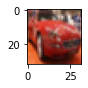

In [5]:
plot_sample(5)

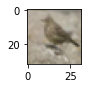

In [6]:
plot_sample(120)

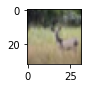

In [7]:
plot_sample(520)

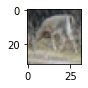

In [8]:
plot_sample(521)

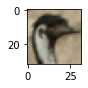

In [9]:
plot_sample(522)

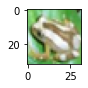

In [10]:
plot_sample(556)

In [11]:
print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


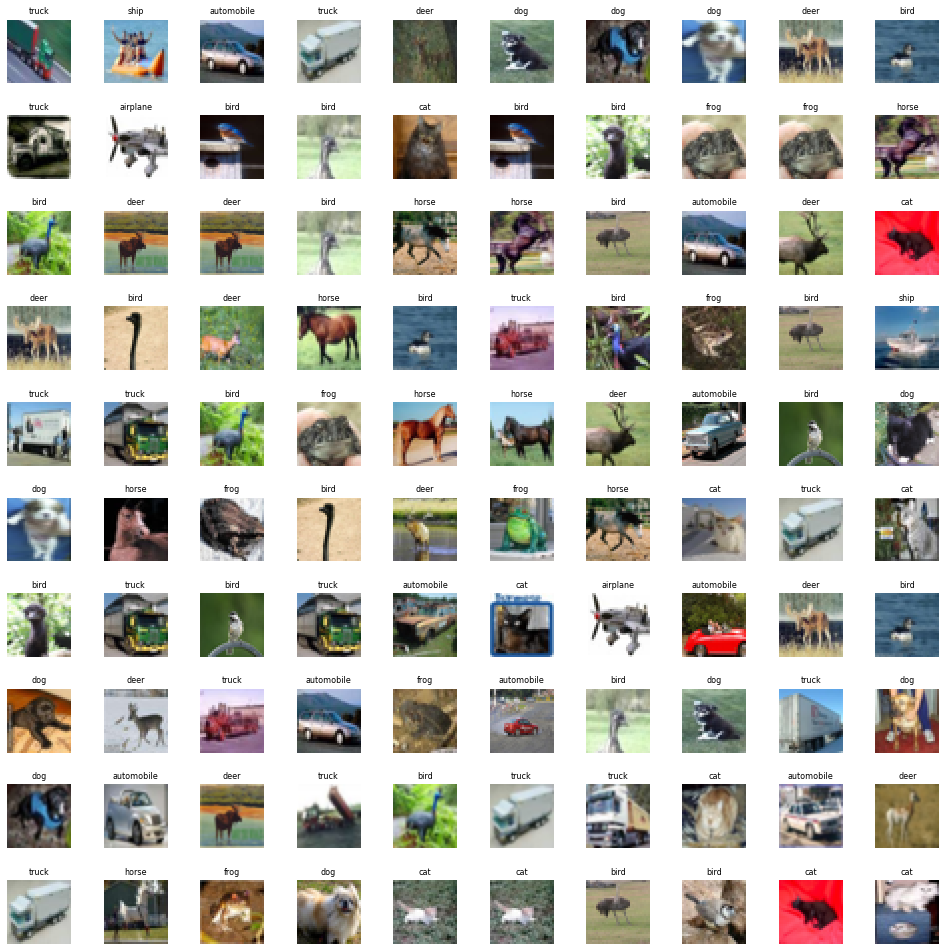

In [12]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']


W_grid = 10
L_grid = 10



fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 10 x 10 matrix into 100 array

n_train = 100    #the number of images i want to show  

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')              #to did't show gride in images

plt.subplots_adjust(hspace=0.5)      # the space bettween images

Text(0.5, 1.0, 'Class distribution in training set')

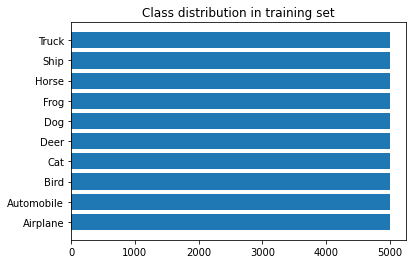

In [13]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

classes, counts = np.unique(y_train, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in training set')


# Data Preprocessing

In [14]:
# Scale the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Transform target variable into one-hotencoding
#convert matrix to zeros and ones
y_encoded_train = to_categorical(y_train, 10)
y_encoded_test = to_categorical(y_test, 10)

In [15]:
print(y_train[5])
y_encoded_train[5]

[1]


array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
print(y_train.shape)
print(y_encoded_train.shape)

(50000, 1)
(50000, 10)


# Model Building

In [17]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())     #good to reduce overviting because in training z grow up with time it work to scale it after activation function
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))  #delete some random nodes
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3),  activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3),  activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3),  activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3),  activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())      #convert to 1d array
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))   #dense mean this layer is fully conected laryer
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

2022-12-30 15:01:37.713863: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [18]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)         # to stop training if 'val_loss' is'not change in two epochs consecutive

In [19]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)  
# genrate alot of image in ٌRam  help to reduce overviting 
train_generator = data_generator.flow(X_train, y_encoded_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

In [20]:
r = model.fit(train_generator, 
              epochs=50,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_encoded_test), 
            #  callbacks=[early_stop],
              batch_size=batch_size,
             )

2022-12-30 15:01:38.800508: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
1562/1562 [==============================] - 208s 132ms/step - loss: 1.6364 - accuracy: 0.4071 - precision: 0.6214 - recall: 0.1921 - val_loss: 1.3501 - val_accuracy: 0.5198 - val_precision: 0.6562 - val_recall: 0.3839
Epoch 2/50
1562/1562 [==============================] - 206s 132ms/step - loss: 1.2332 - accuracy: 0.5615 - precision: 0.7287 - recall: 0.3958 - val_loss: 1.0708 - val_accuracy: 0.6269 - val_precision: 0.7491 - val_recall: 0.4962
Epoch 3/50
1562/1562 [==============================] - 206s 132ms/step - loss: 1.0443 - accuracy: 0.6362 - precision: 0.7727 - recall: 0.5057 - val_loss: 0.8732 - val_accuracy: 0.6936 - val_precision: 0.8048 - val_recall: 0.6041
Epoch 4/50
1562/1562 [==============================] - 208s 133ms/step - loss: 0.9384 - accuracy: 0.6778 - precision: 0.7953 - recall: 0.5628 - val_loss: 0.7983 - val_accuracy: 0.7239 - val_precision: 0.8211 - val_recall: 0.6411
Epoch 5/50
1562/1562 [==============================] - 207s 132ms/step - loss: 

# Model Evaluation

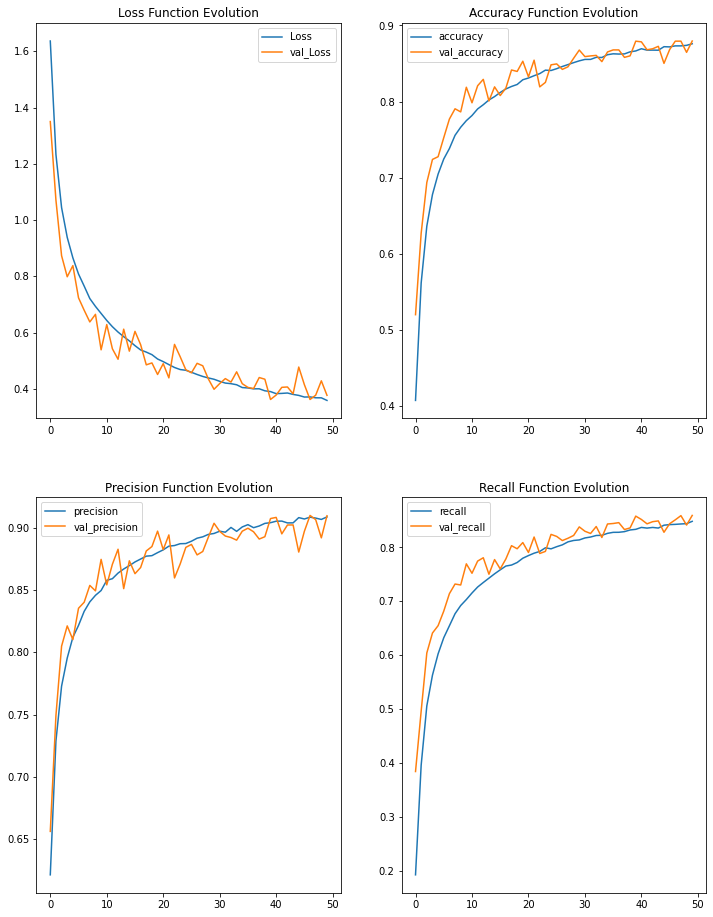

In [21]:
plt.figure(figsize=(12, 16))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

In [22]:
evaluation = model.evaluate(X_test, y_encoded_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

313/313 [==============================] - 10s 32ms/step - loss: 0.3768 - accuracy: 0.8796 - precision: 0.9094 - recall: 0.8595
Test Accuracy : 87.96%


In [23]:
y_pred = model.predict(X_test)
print(y_pred[0].shape)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)

(10,)


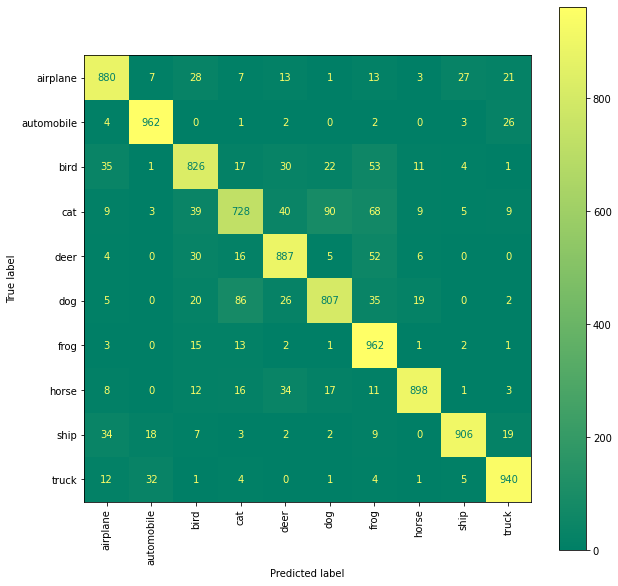

In [24]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1000
           1       0.94      0.96      0.95      1000
           2       0.84      0.83      0.84      1000
           3       0.82      0.73      0.77      1000
           4       0.86      0.89      0.87      1000
           5       0.85      0.81      0.83      1000
           6       0.80      0.96      0.87      1000
           7       0.95      0.90      0.92      1000
           8       0.95      0.91      0.93      1000
           9       0.92      0.94      0.93      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

